<a href="https://colab.research.google.com/github/snehasri2600/Ocean-Classification/blob/main/Adv_Data_Ocean_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Going to attempt to merge the datasets from these 2 websites and work with them:

[ArcGIS Map Layer for Classification:](https://data-gis.unep-wcmc.org/portal/home/item.html?id=80567b4443f4457b822f645a2f0d70cf)
This map layer provides a regional classification system for ocean water by realm and biome, depending on the column. Combines 2 datasets in itself -- one from 2007 (MEOW), the other from 2012 (PPOW). Type: shapefile with polygon geometries.

[ECCO Datasets with Ocean Measurements:](https://podaac.jpl.nasa.gov/ECCO?sections=data)
This is a series of datasets provided by NASA with daily and monthly means of different variables. Features will be selected from this dataset to classify ocean realms. For this project, I will use the latest available monthly mean data (December 2017), though one consideration is summer/winter seasons in different hemispheres. A complete time series analysis would be required for more definitive results. Type: netCDF files with latitude, longitude, and time.

Variables:
*   [Atmospheric surface temperature, humidity, wind, and pressure](https://podaac.jpl.nasa.gov/dataset/ECCO_L4_ATM_STATE_05DEG_MONTHLY_V4R4)
*   [Ocean density, stratification, and hydrostatic pressure](https://podaac.jpl.nasa.gov/dataset/ECCO_L4_DENS_STRAT_PRESS_05DEG_DAILY_V4R4)
* If needed: [Ocean temperature and salinity](https://podaac.jpl.nasa.gov/dataset/ECCO_L4_TEMP_SALINITY_05DEG_DAILY_V4R4) (this one is only available as a daily mean, but data is available as individual files for December 2017. I will have to calculate means and put them in the dataset for use.)


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [2]:
!pip install arcgis

# Downloading and Exploring the Classification Layer

In [3]:
import arcgis

In [4]:
from arcgis import GIS
from arcgis.features import FeatureLayer, FeatureLayerCollection

In [5]:
gis = GIS()
class_layer_to_query = FeatureLayer('https://data-gis.unep-wcmc.org/server/rest/services/WCMC036_MEOW_PPOW_2007_2012/MapServer/0')

In [6]:
class_layer = class_layer_to_query.query(where='1=1', out_fields='REALM', geometry_precision=2, return_geometry=True)

In [7]:
# Exlporing the classificiation map shapefile dataset
import geopandas as gpd

In [8]:
classification = gpd.read_file(class_layer)

/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


In [9]:
# Check coordinate system of GeoDataFrame
print(classification.crs)

EPSG:4326


In [10]:
# Display the the GeoDataFrame
display(classification)

,objectid,realm,geometry
0,1,Indo-Pacific Warm Water,"POLYGON ((43.39 -16.53, 43.39 -16.53, 43.39 -1..."
1,2,Southern Cold Water,"MULTIPOLYGON (((46.59 -52.16, 46.69 -52.18, 46..."
2,3,Southern Cold Water,"POLYGON ((55.95 -45.5, 56.05 -45.51, 56.15 -45..."
3,4,Northern Cold Water,"MULTIPOLYGON (((180 84.3, 180 84.2, 180 84.1, ..."
4,5,Atlantic Warm Water,"POLYGON ((11.61 -15.78, 11.61 -15.79, 11.61 -1..."
...,...,...,...
264,265,Temperate Australasia,"MULTIPOLYGON (((-177.78 -29.23, -177.77 -29.24..."
265,266,Temperate Australasia,"MULTIPOLYGON (((173.24 -34.41, 173.24 -34.41, ..."
266,267,Temperate Australasia,"POLYGON ((-176.29 -43.35, -176.28 -43.35, -176..."
267,268,Temperate Australasia,"MULTIPOLYGON (((172.73 -34.53, 172.73 -34.53, ..."


In [11]:
print(classification['realm'].unique())

['Indo-Pacific Warm Water' 'Southern Cold Water' 'Northern Cold Water'
 'Atlantic Warm Water' 'Arctic' 'Temperate Northern Atlantic'
 'Temperate Northern Pacific' 'Tropical Atlantic' 'Western Indo-Pacific'
 'Central Indo-Pacific' 'Eastern Indo-Pacific' 'Tropical Eastern Pacific'
 'Temperate South America' 'Temperate Southern Africa'
 'Temperate Australasia' 'Southern Ocean']


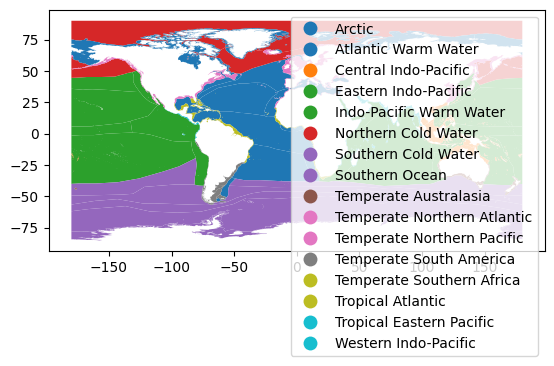

In [12]:
classification.plot(column='realm', legend=True)
plt.show()

# Converting the Features (Variables) to a DataFrame

In [13]:
import xarray as xr

#Atmpospheric surface temperature, humidity, wind speed, and pressure
# Use gdown to download the file directly from Google Drive
atm_id = '1tBkiAVTMh3U8Dqx8um4jctk6YoZFt_dt'
atm_output = 'atm_temp_wind_hum_pres.nc'
gdown.download(id=atm_id, output=atm_output, quiet=False)

!pip install netcdf4 # Install netcdf4 for xarray to use
atm_variables = xr.open_dataset(atm_output)
display(atm_variables)

Downloading...
From: https://drive.google.com/uc?id=1tBkiAVTMh3U8Dqx8um4jctk6YoZFt_dt
To: /content/atm_temp_wind_hum_pres.nc
100%|██████████| 1.81M/1.81M [00:00<00:00, 12.1MB/s]


<xarray.Dataset> Size: 6MB
Dimensions:         (time: 1, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 8B 2017-12-16T06:00:00
  * latitude        (latitude) float32 1kB -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 3kB -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] 16B ...
    latitude_bnds   (latitude, nv) float32 3kB ...
    longitude_bnds  (longitude, nv) float32 6kB ...
Dimensions without coordinates: nv
Data variables:
    EXFatemp        (time, latitude, longitude) float32 1MB ...
    EXFaqh          (time, latitude, longitude) float32 1MB ...
    EXFewind        (time, latitude, longitude) float32 1MB ...
    EXFnwind        (time, latitude, longitude) float32 1MB ...
    EXFwspee        (time, latitude, longitude) float32 1MB ...
    EXFpress        (time, latitude, longitude) float32 1MB ...
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on a regular lat-lon grid. ...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            2017-12-31T12:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          2017-12-01T00:00:00
    title:                        ECCO Atmosphere Surface Temperature, Humidi...
    uuid:                         a40f85ae-4158-11eb-a6e9-0cc47a3f8269

In [14]:
# Ocean density, stratification, and hydrostatic pressure
# Use gdown to download the file directly from Google Drive
file_id1 = '1xxHT73c3JeP2Ql0zF-lFHbkf9_4kWuqS'
output_file1 = 'density_strat_hydropres.nc'
gdown.download(id=file_id1, output=output_file1, quiet=False)

dens_strat_hydropres = xr.open_dataset(output_file1)
display(dens_strat_hydropres)

Downloading...
From: https://drive.google.com/uc?id=1xxHT73c3JeP2Ql0zF-lFHbkf9_4kWuqS
To: /content/density_strat_hydropres.nc
100%|██████████| 33.6M/33.6M [00:00<00:00, 70.5MB/s]


<xarray.Dataset> Size: 156MB
Dimensions:         (time: 1, Z: 50, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 8B 2017-12-16T06:00:00
  * Z               (Z) float32 200B -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * latitude        (latitude) float32 1kB -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 3kB -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] 16B ...
    latitude_bnds   (latitude, nv) float32 3kB ...
    longitude_bnds  (longitude, nv) float32 6kB ...
    Z_bnds          (Z, nv) float32 400B ...
Dimensions without coordinates: nv
Data variables:
    RHOAnoma        (time, Z, latitude, longitude) float32 52MB ...
    DRHODR          (time, Z, latitude, longitude) float32 52MB ...
    PHIHYD          (time, Z, latitude, longitude) float32 52MB ...
Attributes: (12/62)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on a regular lat-lon gri...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               2017-12-31T12:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             2017-12-01T00:00:00
    title:                           ECCO Ocean Density, Stratification, and ...
    uuid:                            109d84b8-415a-11eb-b774-0cc47a3f69ef

In [15]:
#Merging the datasets
all_variables = xr.merge([atm_variables, dens_strat_hydropres])
display(all_variables)

/tmp/ipython-input-2328718939.py:2: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  all_variables = xr.merge([atm_variables, dens_strat_hydropres])
/tmp/ipython-input-2328718939.py:2: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  all_variables = xr.merge([atm_variables, dens_strat_hydropres])
/tmp/ipython-input-2328718939.py:2: FutureWa

<xarray.Dataset> Size: 162MB
Dimensions:         (time: 1, latitude: 360, longitude: 720, nv: 2, Z: 50)
Coordinates:
  * time            (time) datetime64[ns] 8B 2017-12-16T06:00:00
  * latitude        (latitude) float32 1kB -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 3kB -179.8 -179.2 -178.8 ... 179.2 179.8
  * Z               (Z) float32 200B -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
    time_bnds       (time, nv) datetime64[ns] 16B 2017-12-01 2017-12-31T12:00:00
    latitude_bnds   (latitude, nv) float32 3kB -90.0 -89.5 -89.5 ... 89.5 90.0
    longitude_bnds  (longitude, nv) float32 6kB -180.0 -179.5 ... 179.5 180.0
    Z_bnds          (Z, nv) float32 400B ...
Dimensions without coordinates: nv
Data variables:
    EXFatemp        (time, latitude, longitude) float32 1MB ...
    EXFaqh          (time, latitude, longitude) float32 1MB ...
    EXFewind        (time, latitude, longitude) float32 1MB ...
    EXFnwind        (time, latitude, longitude) float32 1MB ...
    EXFwspee        (time, latitude, longitude) float32 1MB ...
    EXFpress        (time, latitude, longitude) float32 1MB ...
    RHOAnoma        (time, Z, latitude, longitude) float32 52MB ...
    DRHODR          (time, Z, latitude, longitude) float32 52MB ...
    PHIHYD          (time, Z, latitude, longitude) float32 52MB ...
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on a regular lat-lon grid. ...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            2017-12-31T12:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          2017-12-01T00:00:00
    title:                        ECCO Atmosphere Surface Temperature, Humidi...
    uuid:                         a40f85ae-4158-11eb-a6e9-0cc47a3f8269

In [16]:
#Converting to DataFrame and unstacking the MultiIndex layers
all_variables_df = all_variables[['EXFatemp', 'EXFaqh','EXFewind','EXFnwind','EXFwspee','EXFpress','RHOAnoma','DRHODR','PHIHYD']].to_dataframe(dim_order = ['time', 'latitude','longitude','Z']).reset_index()
print(all_variables_df.columns)
display(all_variables_df)

Index(['time', 'latitude', 'longitude', 'Z', 'EXFatemp', 'EXFaqh', 'EXFewind',
       'EXFnwind', 'EXFwspee', 'EXFpress', 'RHOAnoma', 'DRHODR', 'PHIHYD'],
      dtype='object')


,time,latitude,longitude,Z,EXFatemp,EXFaqh,EXFewind,EXFnwind,EXFwspee,EXFpress,RHOAnoma,DRHODR,PHIHYD
0,2017-12-16 06:00:00,-89.75,-179.75,-5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-12-16 06:00:00,-89.75,-179.75,-15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-12-16 06:00:00,-89.75,-179.75,-25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-12-16 06:00:00,-89.75,-179.75,-35.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-12-16 06:00:00,-89.75,-179.75,-45.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12959995,2017-12-16 06:00:00,89.75,179.75,-4264.25,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,18.748615,-0.000002,458.823883
12959996,2017-12-16 06:00:00,89.75,179.75,-4640.25,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,NaN,NaN,NaN
12959997,2017-12-16 06:00:00,89.75,179.75,-5039.25,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,NaN,NaN,NaN
12959998,2017-12-16 06:00:00,89.75,179.75,-5461.25,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,NaN,NaN,NaN


# Fitting Features into the Classification File

In [17]:
print(all_variables_df['Z'].unique())
print(all_variables_df['Z'].min())
print(all_variables_df['Z'].max())

# # # Since many of our variables are atmosphere-related, a low depth could be useful for this model. We will filter the data so we only have data that is measured at a -5.0ft depth.
all_variables_df = all_variables_df[all_variables_df['Z'] == -5.0]

# # # We can now safely drop the depth variable from our dataset
all_variables_df = all_variables_df.drop(['Z'], axis=1)
display(all_variables_df)

[-5.000000e+00 -1.500000e+01 -2.500000e+01 -3.500000e+01 -4.500000e+01
 -5.500000e+01 -6.500000e+01 -7.500500e+01 -8.502500e+01 -9.509500e+01
 -1.053100e+02 -1.158700e+02 -1.271500e+02 -1.397400e+02 -1.544700e+02
 -1.724000e+02 -1.947350e+02 -2.227100e+02 -2.574700e+02 -2.999300e+02
 -3.506800e+02 -4.099300e+02 -4.774700e+02 -5.527100e+02 -6.347350e+02
 -7.224000e+02 -8.144700e+02 -9.097400e+02 -1.007155e+03 -1.105905e+03
 -1.205535e+03 -1.306205e+03 -1.409150e+03 -1.517095e+03 -1.634175e+03
 -1.765135e+03 -1.914150e+03 -2.084035e+03 -2.276225e+03 -2.491250e+03
 -2.729250e+03 -2.990250e+03 -3.274250e+03 -3.581250e+03 -3.911250e+03
 -4.264250e+03 -4.640250e+03 -5.039250e+03 -5.461250e+03 -5.906250e+03]
-5906.25
-5.0


,time,latitude,longitude,EXFatemp,EXFaqh,EXFewind,EXFnwind,EXFwspee,EXFpress,RHOAnoma,DRHODR,PHIHYD
0,2017-12-16 06:00:00,-89.75,-179.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,2017-12-16 06:00:00,-89.75,-179.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,2017-12-16 06:00:00,-89.75,-178.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,2017-12-16 06:00:00,-89.75,-178.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,2017-12-16 06:00:00,-89.75,-177.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12959750,2017-12-16 06:00:00,89.75,177.75,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,-3.049556,0.0,109.382149
12959800,2017-12-16 06:00:00,89.75,178.25,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,-3.049556,0.0,109.382149
12959850,2017-12-16 06:00:00,89.75,178.75,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,-3.049556,0.0,109.382149
12959900,2017-12-16 06:00:00,89.75,179.25,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,-3.049556,0.0,109.382149


In [18]:
print(classification['geometry'].unique)

<bound method Series.unique of 0      POLYGON ((43.39 -16.53, 43.39 -16.53, 43.39 -1...
1      MULTIPOLYGON (((46.59 -52.16, 46.69 -52.18, 46...
2      POLYGON ((55.95 -45.5, 56.05 -45.51, 56.15 -45...
3      MULTIPOLYGON (((180 84.3, 180 84.2, 180 84.1, ...
4      POLYGON ((11.61 -15.78, 11.61 -15.79, 11.61 -1...
                             ...                        
264    MULTIPOLYGON (((-177.78 -29.23, -177.77 -29.24...
265    MULTIPOLYGON (((173.24 -34.41, 173.24 -34.41, ...
266    POLYGON ((-176.29 -43.35, -176.28 -43.35, -176...
267    MULTIPOLYGON (((172.73 -34.53, 172.73 -34.53, ...
268    MULTIPOLYGON (((178.99 -47.31, 179.01 -47.31, ...
Name: geometry, Length: 269, dtype: geometry>


Because the classification dataset has polygons and multipolygons as its geometry, I need to use GeoPandas to conduct a spatial join of the two datasets.

In [19]:
# Creating a geometry column with latitude and longitude values according to a specific coordinate system within all_variables
variable_geometry = gpd.points_from_xy(all_variables_df['latitude'], all_variables_df['longitude'])

# Turning all_variables into a GeoDataFrame in order to merge with the classification dataset (this takes the latitude and longitude columns and turns them into point geometry)
all_variables_gdf = gpd.GeoDataFrame(all_variables_df, geometry=variable_geometry, crs='EPSG:4326')
display(all_variables_gdf)

,time,latitude,longitude,EXFatemp,EXFaqh,EXFewind,EXFnwind,EXFwspee,EXFpress,RHOAnoma,DRHODR,PHIHYD,geometry
0,2017-12-16 06:00:00,-89.75,-179.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -179.75)
50,2017-12-16 06:00:00,-89.75,-179.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -179.25)
100,2017-12-16 06:00:00,-89.75,-178.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -178.75)
150,2017-12-16 06:00:00,-89.75,-178.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -178.25)
200,2017-12-16 06:00:00,-89.75,-177.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -177.75)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12959750,2017-12-16 06:00:00,89.75,177.75,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,-3.049556,0.0,109.382149,POINT (89.75 177.75)
12959800,2017-12-16 06:00:00,89.75,178.25,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,-3.049556,0.0,109.382149,POINT (89.75 178.25)
12959850,2017-12-16 06:00:00,89.75,178.75,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,-3.049556,0.0,109.382149,POINT (89.75 178.75)
12959900,2017-12-16 06:00:00,89.75,179.25,253.645111,0.000698,5.007825,2.929656,7.353284,102142.109375,-3.049556,0.0,109.382149,POINT (89.75 179.25)


In [20]:
#Merging all_variables_gdf with classification using a spatial join
merged_gdf = gpd.sjoin(all_variables_gdf, classification, how='inner', predicate='within')
display(merged_gdf)

,time,latitude,longitude,EXFatemp,EXFaqh,EXFewind,EXFnwind,EXFwspee,EXFpress,RHOAnoma,DRHODR,PHIHYD,geometry,index_right,objectid,realm
10700,2017-12-16 06:00:00,-89.75,-72.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,233,Southern Ocean
10750,2017-12-16 06:00:00,-89.75,-72.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.25),232,233,Southern Ocean
10800,2017-12-16 06:00:00,-89.75,-71.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -71.75),1,2,Southern Cold Water
10850,2017-12-16 06:00:00,-89.75,-71.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -71.25),1,2,Southern Cold Water
10900,2017-12-16 06:00:00,-89.75,-70.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -70.75),1,2,Southern Cold Water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12950750,2017-12-16 06:00:00,89.75,87.75,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,POINT (89.75 87.75),3,4,Northern Cold Water
12950800,2017-12-16 06:00:00,89.75,88.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,POINT (89.75 88.25),3,4,Northern Cold Water
12950850,2017-12-16 06:00:00,89.75,88.75,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,POINT (89.75 88.75),3,4,Northern Cold Water
12950900,2017-12-16 06:00:00,89.75,89.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,POINT (89.75 89.25),3,4,Northern Cold Water


In [21]:
#Renaming columns so they are more descriptive and understandable
merged_gdf.rename(columns={'EXFatemp':'atm_surface_temp', 'EXFaqh':'atm_surface_humidity', 'EXFewind':'zonal_wind_speed', 'EXFnwind':'meridional_wind_speed', 'EXFwspee':'wind_speed','EXFpress':'atm_surface_pressure', 'Z':'depth'}, inplace=True)
merged_gdf.rename(columns={'RHOAnoma':'seawater_density_anomaly', 'DRHODR':'density_stratification', 'PHIHYD':'hydrostatic_pressure_anomaly'}, inplace=True)
merged_gdf.rename(columns={'REALM':'realm'}, inplace=True)
display(merged_gdf)

,time,latitude,longitude,atm_surface_temp,atm_surface_humidity,zonal_wind_speed,meridional_wind_speed,wind_speed,atm_surface_pressure,seawater_density_anomaly,density_stratification,hydrostatic_pressure_anomaly,geometry,index_right,objectid,realm
10700,2017-12-16 06:00:00,-89.75,-72.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,233,Southern Ocean
10750,2017-12-16 06:00:00,-89.75,-72.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.25),232,233,Southern Ocean
10800,2017-12-16 06:00:00,-89.75,-71.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -71.75),1,2,Southern Cold Water
10850,2017-12-16 06:00:00,-89.75,-71.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -71.25),1,2,Southern Cold Water
10900,2017-12-16 06:00:00,-89.75,-70.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -70.75),1,2,Southern Cold Water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12950750,2017-12-16 06:00:00,89.75,87.75,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,POINT (89.75 87.75),3,4,Northern Cold Water
12950800,2017-12-16 06:00:00,89.75,88.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,POINT (89.75 88.25),3,4,Northern Cold Water
12950850,2017-12-16 06:00:00,89.75,88.75,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,POINT (89.75 88.75),3,4,Northern Cold Water
12950900,2017-12-16 06:00:00,89.75,89.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,POINT (89.75 89.25),3,4,Northern Cold Water


In [22]:
# Making sure nothing is misunderstood from the dataset
print(merged_gdf['time'].unique())

<DatetimeArray>
['2017-12-16 06:00:00']
Length: 1, dtype: datetime64[ns]


There is only one datetime value across the board for all data, so that "variable" is obsolete (as expected).

Additionally, certain variables cannot be used to build a machine learning model. For example, using latitude, longitude, or geometry would make the model obsolete, since the ocean has been specifically classified by location.

In [23]:
# Converting to a regular DataFrame
merged_df = pd.DataFrame(merged_gdf)
display(merged_df)

,time,latitude,longitude,atm_surface_temp,atm_surface_humidity,zonal_wind_speed,meridional_wind_speed,wind_speed,atm_surface_pressure,seawater_density_anomaly,density_stratification,hydrostatic_pressure_anomaly,geometry,index_right,objectid,realm
10700,2017-12-16 06:00:00,-89.75,-72.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.75),232,233,Southern Ocean
10750,2017-12-16 06:00:00,-89.75,-72.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -72.25),232,233,Southern Ocean
10800,2017-12-16 06:00:00,-89.75,-71.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -71.75),1,2,Southern Cold Water
10850,2017-12-16 06:00:00,-89.75,-71.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -71.25),1,2,Southern Cold Water
10900,2017-12-16 06:00:00,-89.75,-70.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-89.75 -70.75),1,2,Southern Cold Water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12950750,2017-12-16 06:00:00,89.75,87.75,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,POINT (89.75 87.75),3,4,Northern Cold Water
12950800,2017-12-16 06:00:00,89.75,88.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,POINT (89.75 88.25),3,4,Northern Cold Water
12950850,2017-12-16 06:00:00,89.75,88.75,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,POINT (89.75 88.75),3,4,Northern Cold Water
12950900,2017-12-16 06:00:00,89.75,89.25,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,POINT (89.75 89.25),3,4,Northern Cold Water


In [24]:
# Drop time, latitude, longitude, and geometry columns
merged_df = merged_df.drop(['time', 'latitude', 'longitude', 'geometry'], axis=1, errors='ignore')

# Dropping categorical variables we don't want
merged_df = merged_df.drop(['index_right', 'globalid', 'objectid'], axis=1, errors='ignore')

display(merged_df)

,atm_surface_temp,atm_surface_humidity,zonal_wind_speed,meridional_wind_speed,wind_speed,atm_surface_pressure,seawater_density_anomaly,density_stratification,hydrostatic_pressure_anomaly,realm
10700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Ocean
10750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Ocean
10800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Cold Water
10850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Cold Water
10900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Cold Water
...,...,...,...,...,...,...,...,...,...,...
12950750,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,Northern Cold Water
12950800,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,Northern Cold Water
12950850,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,Northern Cold Water
12950900,253.907761,0.000719,-3.107174,4.886118,7.411502,102083.304688,-3.039971,0.0,109.265701,Northern Cold Water


We now have a decent dataset to work with. But we still haven't dealt with the repeating and different depth measurements in our dataset.

The final dataset is now a DataFrame with all necessary variables for machine learning. I can now import scikitlearn and begin data splitting and preprocessing for the model.

# Data Preprocessing

In [25]:
pip install -U scikit-learn

In [26]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [27]:
# Define features (X) and target (y)

# Dropping 'realm' from the features column so we can use all other variables as features, and label the target as the 'realm'
X = merged_df.drop(['realm'], axis=1)
y = merged_df['realm']

# Split into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [28]:
# Exploring the training set
print(X_train.info())
print(X_train.describe())
print()
print(y_train.info())
print(y_train.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 59122 entries, 9698050 to 884800
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   atm_surface_temp              38888 non-null  float32
 1   atm_surface_humidity          38888 non-null  float32
 2   zonal_wind_speed              38888 non-null  float32
 3   meridional_wind_speed         38888 non-null  float32
 4   wind_speed                    38888 non-null  float32
 5   atm_surface_pressure          38888 non-null  float32
 6   seawater_density_anomaly      38888 non-null  float32
 7   density_stratification        38888 non-null  float32
 8   hydrostatic_pressure_anomaly  38888 non-null  float32
dtypes: float32(9)
memory usage: 2.5 MB
None
       atm_surface_temp  atm_surface_humidity  zonal_wind_speed  \
count      38888.000000          38888.000000      38888.000000   
mean         284.797852              0.008939          0.35488

We can now use the OneHotEncoder on the target for this model.

In [29]:
ohe = OneHotEncoder(sparse_output=False)

# Reshape y_train and y_test to be 2D arrays
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# OneHotEncoder on y_train and y_test data
y_train_encoded = ohe.fit_transform(y_train_reshaped)
y_test_encoded = ohe.transform(y_test_reshaped)

# Handling Missing Values

In [30]:
# Checking NaN values
print(f"X_train NaN count: {X_train.isna().sum()}")
print(f"y_train NaN count: {y_train.isna().sum()}")

X_train NaN count: atm_surface_temp                20234
atm_surface_humidity            20234
zonal_wind_speed                20234
meridional_wind_speed           20234
wind_speed                      20234
atm_surface_pressure            20234
seawater_density_anomaly        20234
density_stratification          20234
hydrostatic_pressure_anomaly    20234
dtype: int64
y_train NaN count: 0


There are lots of NaN values in our feature variables. However, all the variables have the same number of missing values.

In [31]:
# Finding where the missing values are located
missing_values = X_train[X_train.isna().any(axis=1)]
display(missing_values)

,atm_surface_temp,atm_surface_humidity,zonal_wind_speed,meridional_wind_speed,wind_speed,atm_surface_pressure,seawater_density_anomaly,density_stratification,hydrostatic_pressure_anomaly
271900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9638900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7037950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10250600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4692300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5267650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5457200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Since we are working with a very large dataset, getting rid of rows with missing values seems fine.
# Applying the process to the training and test sets
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train.loc[X_train_cleaned.index]
X_test_cleaned = X_test.dropna()
y_test_cleaned = y_test.loc[X_test_cleaned.index]

In [33]:
# Checking shapes to see if we still have enough data points for a statistically sound model
print(X_train_cleaned.shape)
print(y_train_cleaned.shape)
print(X_test_cleaned.shape)
print(y_test_cleaned.shape)

(38888, 9)
(38888,)
(13058, 9)
(13058,)


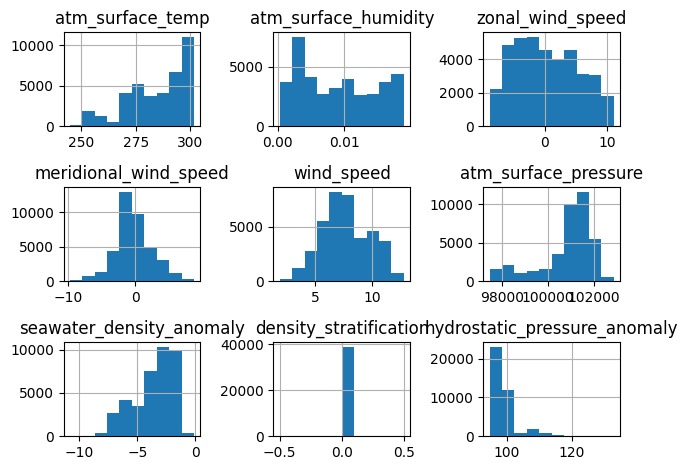

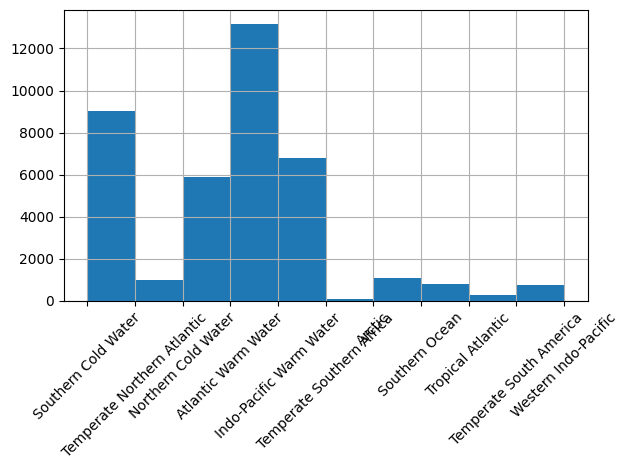

In [34]:
# Visualizing training set data
X_train_cleaned.hist()
plt.tight_layout()
plt.show()
y_train_cleaned.hist()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


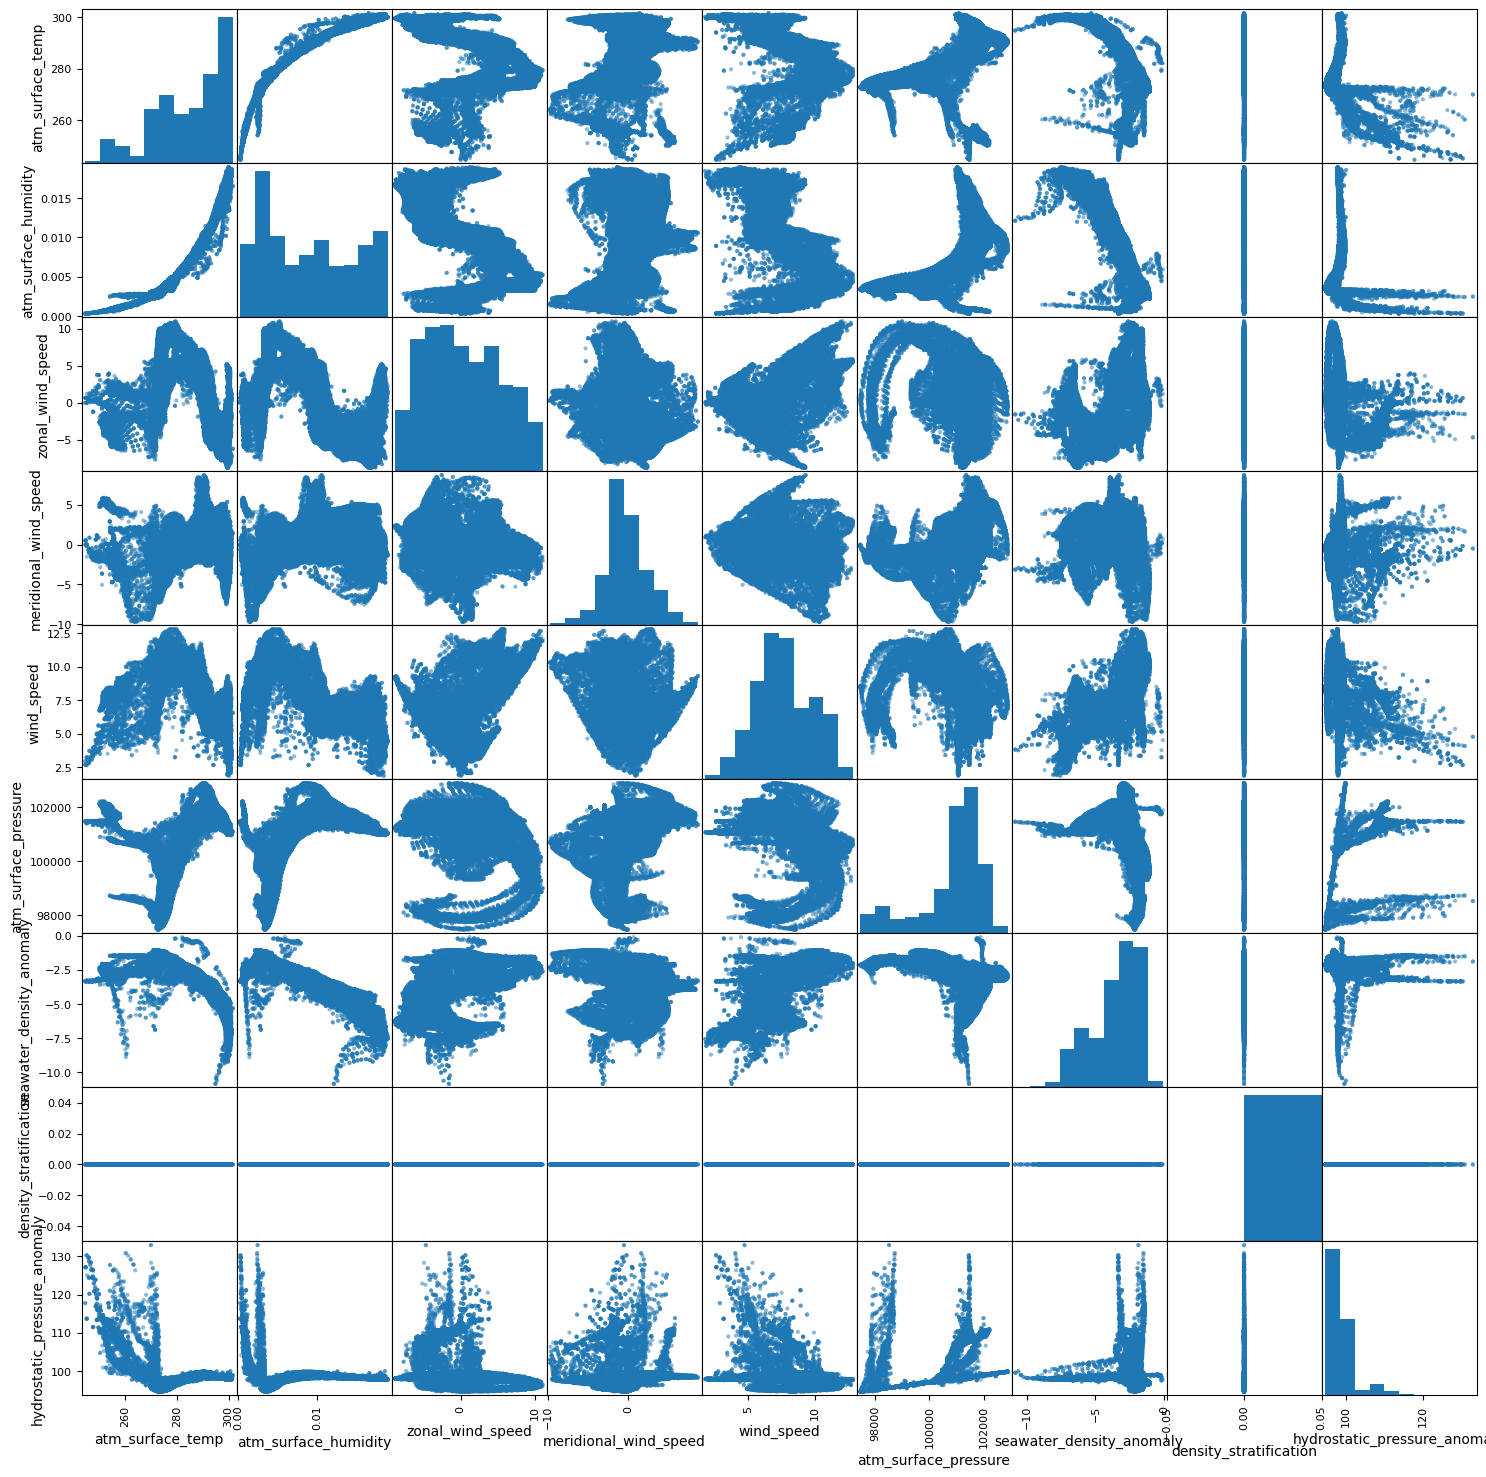

In [35]:
# Visualization cont.
pd.plotting.scatter_matrix(X_train_cleaned, figsize=(18, 18))
plt.show()